In [1]:
#import the dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from citipy import citipy


In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs 

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

601

In [5]:
import requests
requests.__version__

'2.24.0'

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d9627287f4524613874457d10385800d


In [8]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | pevek
Processing Record 2 of Set 1 | palana
Processing Record 3 of Set 1 | vostok
Processing Record 4 of Set 1 | jamame
Processing Record 5 of Set 1 | nyurba
Processing Record 6 of Set 1 | barrow
Processing Record 7 of Set 1 | busselton
Processing Record 8 of Set 1 | meulaboh
Processing Record 9 of Set 1 | kapaa
Processing Record 10 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 11 of Set 1 | amderma
City not found. Skipping...
Processing Record 12 of Set 1 | cicevac
Processing Record 13 of Set 1 | hithadhoo
Processing Record 14 of Set 1 | anadyr
Processing Record 15 of Set 1 | kaitangata
Processing Record 16 of Set 1 | vaini
Processing Record 17 of Set 1 | kharp
Processing Record 18 of Set 1 | cidreira
Processing Record 19 of Set 1 | egvekinot
Processing Record 20 of Set 1 | diepholz
Processing Record 21 of Set 1 | yarqa
Processing Record 22 of Set 1 | dikson
Processing R

Processing Record 39 of Set 4 | miri
Processing Record 40 of Set 4 | vila franca do campo
Processing Record 41 of Set 4 | umm kaddadah
Processing Record 42 of Set 4 | fairbanks
Processing Record 43 of Set 4 | pindi gheb
Processing Record 44 of Set 4 | paamiut
Processing Record 45 of Set 4 | coquimbo
Processing Record 46 of Set 4 | levanger
Processing Record 47 of Set 4 | mouzakion
City not found. Skipping...
Processing Record 48 of Set 4 | sinkat
City not found. Skipping...
Processing Record 49 of Set 4 | vila velha
Processing Record 50 of Set 4 | lodja
Processing Record 1 of Set 5 | muncar
Processing Record 2 of Set 5 | lagoa
Processing Record 3 of Set 5 | nueva gerona
Processing Record 4 of Set 5 | laguna
Processing Record 5 of Set 5 | hermanus
Processing Record 6 of Set 5 | ginir
Processing Record 7 of Set 5 | gushikawa
Processing Record 8 of Set 5 | biloela
Processing Record 9 of Set 5 | kruisfontein
Processing Record 10 of Set 5 | college
Processing Record 11 of Set 5 | kungurtug


Processing Record 27 of Set 8 | tabuk
Processing Record 28 of Set 8 | sambava
Processing Record 29 of Set 8 | maumere
Processing Record 30 of Set 8 | priladozhskiy
Processing Record 31 of Set 8 | dehloran
Processing Record 32 of Set 8 | brownwood
Processing Record 33 of Set 8 | matamoros
Processing Record 34 of Set 8 | yurginskoye
Processing Record 35 of Set 8 | aguimes
Processing Record 36 of Set 8 | vao
Processing Record 37 of Set 8 | verkhoyansk
Processing Record 38 of Set 8 | kulhudhuffushi
Processing Record 39 of Set 8 | obo
Processing Record 40 of Set 8 | ellensburg
Processing Record 41 of Set 8 | liverpool
Processing Record 42 of Set 8 | jeremie
Processing Record 43 of Set 8 | charlottetown
Processing Record 44 of Set 8 | chifeng
Processing Record 45 of Set 8 | springbok
Processing Record 46 of Set 8 | ormara
Processing Record 47 of Set 8 | huai yot
Processing Record 48 of Set 8 | kuryk
Processing Record 49 of Set 8 | vangaindrano
Processing Record 50 of Set 8 | pakxan
Processin

Processing Record 13 of Set 12 | sztum
Processing Record 14 of Set 12 | adrar
Processing Record 15 of Set 12 | grand gaube
Processing Record 16 of Set 12 | hashtrud
Processing Record 17 of Set 12 | bichura
Processing Record 18 of Set 12 | muros
Processing Record 19 of Set 12 | villa bruzual
Processing Record 20 of Set 12 | kieta
Processing Record 21 of Set 12 | miandrivazo
Processing Record 22 of Set 12 | astoria
Processing Record 23 of Set 12 | nome
Processing Record 24 of Set 12 | bulata
Processing Record 25 of Set 12 | hundested
Processing Record 26 of Set 12 | waghausel
Processing Record 27 of Set 12 | ketchikan
Processing Record 28 of Set 12 | indianola
Processing Record 29 of Set 12 | terra santa
Processing Record 30 of Set 12 | kisac
Processing Record 31 of Set 12 | fomboni
Processing Record 32 of Set 12 | wakkanai
Processing Record 33 of Set 12 | shizuishan
Processing Record 34 of Set 12 | ayan
Processing Record 35 of Set 12 | jinchang
Processing Record 36 of Set 12 | kalengwa


In [10]:
len(city_data)

553

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Pevek,69.70,170.31,41.67,72,100,3.47,RU,2020-07-13 18:50:11
1,Palana,59.12,159.97,52.25,90,88,4.63,RU,2020-07-13 18:42:30
2,Vostok,46.49,135.88,55.31,99,57,2.30,RU,2020-07-13 18:50:12
3,Jamame,0.07,42.75,76.69,81,75,10.45,SO,2020-07-13 18:50:12
4,Nyurba,63.28,118.33,58.41,83,12,0.31,RU,2020-07-13 18:50:12
5,Barrow,71.29,-156.79,35.60,83,90,13.87,US,2020-07-13 18:50:12
6,Busselton,-33.65,115.33,55.00,76,100,21.74,AU,2020-07-13 18:45:30
7,Meulaboh,4.14,96.13,77.14,84,99,2.93,ID,2020-07-13 18:50:13
8,Kapaa,22.08,-159.32,77.00,78,40,13.87,US,2020-07-13 18:50:13
9,Cicevac,43.72,21.44,68.00,42,0,9.17,RS,2020-07-13 18:50:13


In [12]:
new_column_order = ["City","Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Pevek,RU,2020-07-13 18:50:11,69.70,170.31,41.67,72,100,3.47
1,Palana,RU,2020-07-13 18:42:30,59.12,159.97,52.25,90,88,4.63
2,Vostok,RU,2020-07-13 18:50:12,46.49,135.88,55.31,99,57,2.30
3,Jamame,SO,2020-07-13 18:50:12,0.07,42.75,76.69,81,75,10.45
4,Nyurba,RU,2020-07-13 18:50:12,63.28,118.33,58.41,83,12,0.31
...,...,...,...,...,...,...,...,...,...
548,Sebring,US,2020-07-13 18:51:49,27.50,-81.44,96.01,52,75,10.29
549,Saint-Joseph,RE,2020-07-13 18:51:49,-21.37,55.62,66.20,77,19,4.70
550,San Jose,US,2020-07-13 18:47:37,37.34,-121.89,82.00,47,1,3.56
551,Hornepayne,CA,2020-07-13 18:51:50,49.21,-84.77,78.51,26,0,4.43


In [13]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [15]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.strftime("%x")
today

'07/13/20'

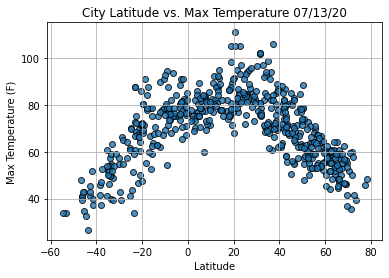

In [16]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

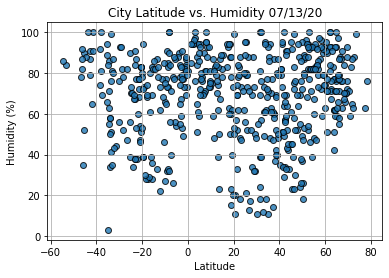

In [17]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

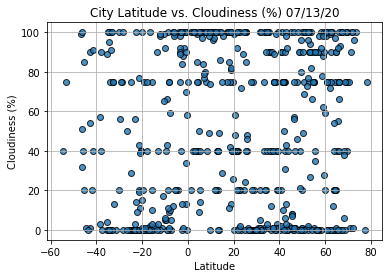

In [18]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

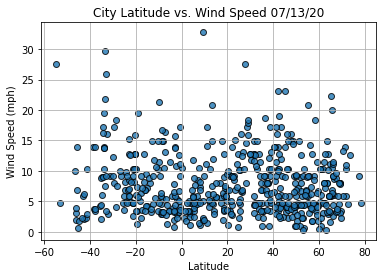

In [19]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [20]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [21]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.  
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [22]:
index13 = city_data_df.loc[13]
index13

City                        Vaini
Country                        TO
Date          2020-07-13 18:50:14
Lat                         -21.2
Lng                        -175.2
Max Temp                     69.8
Humidity                       68
Cloudiness                     20
Wind Speed                  10.29
Name: 13, dtype: object

In [23]:
city_data_df.head(15)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Pevek,RU,2020-07-13 18:50:11,69.70,170.31,41.67,72,100,3.47
1,Palana,RU,2020-07-13 18:42:30,59.12,159.97,52.25,90,88,4.63
2,Vostok,RU,2020-07-13 18:50:12,46.49,135.88,55.31,99,57,2.30
3,Jamame,SO,2020-07-13 18:50:12,0.07,42.75,76.69,81,75,10.45
4,Nyurba,RU,2020-07-13 18:50:12,63.28,118.33,58.41,83,12,0.31
5,Barrow,US,2020-07-13 18:50:12,71.29,-156.79,35.60,83,90,13.87
6,Busselton,AU,2020-07-13 18:45:30,-33.65,115.33,55.00,76,100,21.74
7,Meulaboh,ID,2020-07-13 18:50:13,4.14,96.13,77.14,84,99,2.93
8,Kapaa,US,2020-07-13 18:50:13,22.08,-159.32,77.00,78,40,13.87
9,Cicevac,RS,2020-07-13 18:50:13,43.72,21.44,68.00,42,0,9.17


In [24]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Pevek,RU,2020-07-13 18:50:11,69.70,170.31,41.67,72,100,3.47
1,Palana,RU,2020-07-13 18:42:30,59.12,159.97,52.25,90,88,4.63
2,Vostok,RU,2020-07-13 18:50:12,46.49,135.88,55.31,99,57,2.30
3,Jamame,SO,2020-07-13 18:50:12,0.07,42.75,76.69,81,75,10.45
4,Nyurba,RU,2020-07-13 18:50:12,63.28,118.33,58.41,83,12,0.31
...,...,...,...,...,...,...,...,...,...
544,Araouane,ML,2020-07-13 18:51:49,18.90,-3.53,105.33,15,82,7.56
545,Bull Savanna,JM,2020-07-13 18:42:33,17.89,-77.59,86.65,60,11,14.88
548,Sebring,US,2020-07-13 18:51:49,27.50,-81.44,96.01,52,75,10.29
550,San Jose,US,2020-07-13 18:47:37,37.34,-121.89,82.00,47,1,3.56


In [25]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

In [26]:
northern_hemi_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Pevek,RU,2020-07-13 18:50:11,69.70,170.31,41.67,72,100,3.47
1,Palana,RU,2020-07-13 18:42:30,59.12,159.97,52.25,90,88,4.63
2,Vostok,RU,2020-07-13 18:50:12,46.49,135.88,55.31,99,57,2.30
3,Jamame,SO,2020-07-13 18:50:12,0.07,42.75,76.69,81,75,10.45
4,Nyurba,RU,2020-07-13 18:50:12,63.28,118.33,58.41,83,12,0.31


In [27]:
southern_hemi_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
6,Busselton,AU,2020-07-13 18:45:30,-33.65,115.33,55.00,76,100,21.74
10,Hithadhoo,MV,2020-07-13 18:50:13,-0.60,73.08,85.24,73,0,9.24
12,Kaitangata,NZ,2020-07-13 18:50:14,-46.28,169.85,41.00,82,32,1.99
13,Vaini,TO,2020-07-13 18:50:14,-21.20,-175.20,69.80,68,20,10.29
15,Cidreira,BR,2020-07-13 18:50:14,-30.18,-50.21,54.77,56,100,12.28


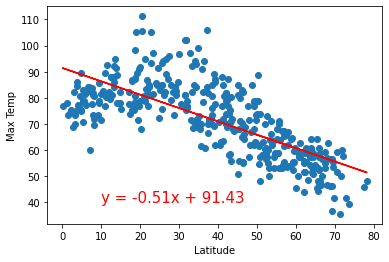

In [28]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere\n for Maximum Temperature', 'Max Temp',(10,40))

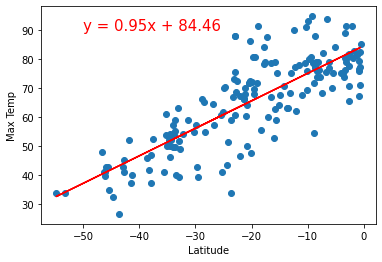

In [29]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere\n for Maximum Temperature', 'Max Temp',(-50,90))

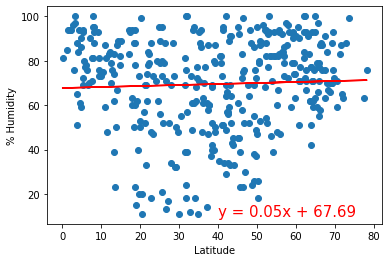

In [30]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere\n for % Humidity', '% Humidity',(40,10))

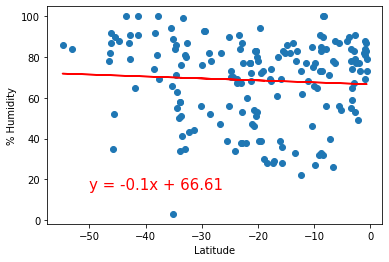

In [31]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere\n for % Humidity', '% Humidity',(-50,15))

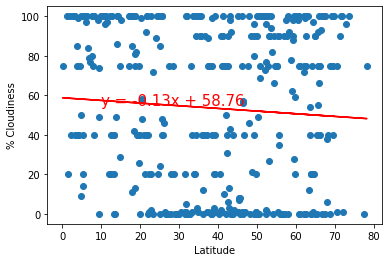

In [32]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function
plot_linear_regression(x_values, y_values,
                   'Linear Regression on the Northern Hemisphere\n for % Cloudiness', '% Cloudiness',(10,55))

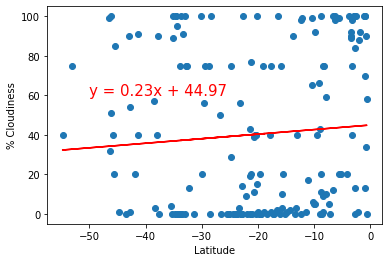

In [33]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere\n for % Cloudiness', '% Cloudiness',(-50,60))

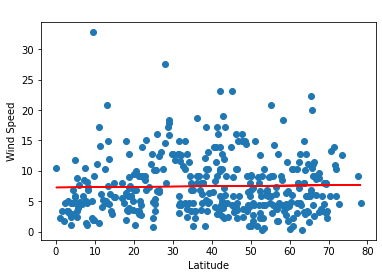

In [34]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere\n for Wind Speed', 'Wind Speed',(40,35))

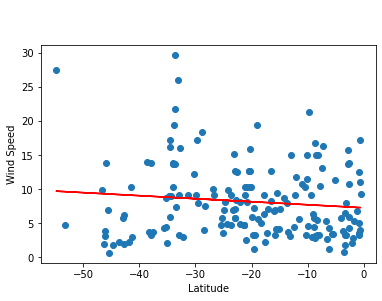

In [35]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere\n for Wind Speed', 'Wind Speed',(-50,35))